In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import os
path = os.getcwd()

In [4]:
df = pd.read_csv('./US/nmurx_us_19Q1.csv')

train, test = train_test_split(df, test_size=0.2)

In [5]:
can_use = train['CAN_USE'].values.reshape(-1,1)
illicit_use = train['ILLXCAN_USE'].values


In [6]:
model = LogisticRegression(solver='liblinear',C=10.0, random_state=0)
model.fit(can_use, illicit_use)
model.classes_

array([0, 1], dtype=int64)

In [7]:
model.intercept_
model.coef_

array([[3.05406951]])

In [8]:
model.predict(can_use)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
model.predict_proba(can_use)

array([[0.60815301, 0.39184699],
       [0.60815301, 0.39184699],
       [0.97050582, 0.02949418],
       ...,
       [0.97050582, 0.02949418],
       [0.97050582, 0.02949418],
       [0.97050582, 0.02949418]])

In [10]:
model.score(can_use, illicit_use)

0.8126203029542222

In [11]:
can_use_test = test['CAN_USE'].values.reshape(-1,1)
illicit_use_test = test['ILLXCAN_USE'].values

In [12]:
model.score(can_use_test, illicit_use_test)

0.8155648535564853

In [13]:
print(classification_report(illicit_use_test, model.predict(can_use_test)))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4873
           1       0.00      0.00      0.00      1102

    accuracy                           0.82      5975
   macro avg       0.41      0.50      0.45      5975
weighted avg       0.67      0.82      0.73      5975

C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chave\anaconda3\lib\site-packages\

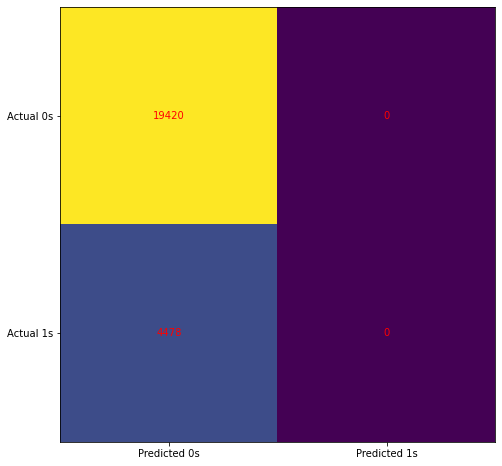

In [14]:
cm = confusion_matrix(illicit_use, model.predict(can_use))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()